In [1]:
import numpy as np
import skimage.io as skio
import skimage.transform as skit

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def px_neighbors(img, dist=1, n_pairs=-1):
    indices = np.arange(img.size)
    np.random.shuffle(indices)
    if n_pairs > 0:
        indices = indices[:n_pairs]
    x1, x2 = [], []
    for idx in indices:
        row, col = np.unravel_index(idx, img.shape)
        if row + dist < img.shape[0]:
            x1.append(img[row, col])
            x2.append(img[row + dist, col])
        if col + dist < img.shape[1]:
            x1.append(img[row, col])
            x2.append(img[row, col + dist])
    return x1, x2

In [3]:
images = [
    'cat_louie.jpg',
    'anteater.jpg'
]

# Choose 1000 random pixels:

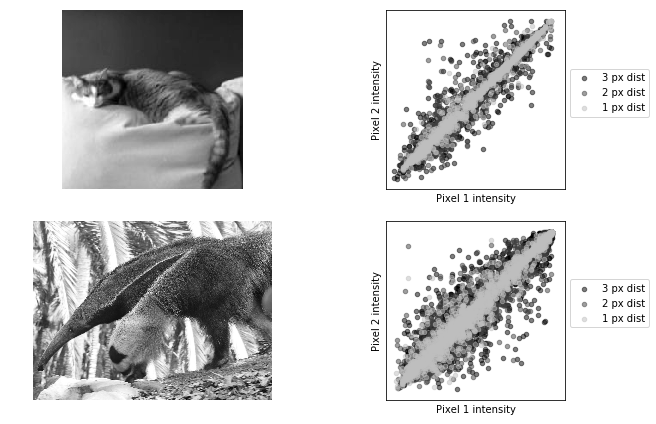

In [11]:
fig, axes = plt.subplots(nrows=len(images), ncols=2, figsize=(10, 3 * len(images)))
for imgfile, ax in zip(images, axes):
    img = skio.imread(imgfile, as_grey=True)
    ax[0].imshow(img, cmap='gray')
    ax[0].axis('off')
    for dist, gray in zip([3, 2, 1], [0, 0.25, 0.75]):
        ax[1].scatter(*px_neighbors(img, dist=dist, n_pairs=1000),
                      alpha=0.5, s=20,
                      c=(gray, gray, gray),
                      label='%d px dist' % dist)
        ax[1].axis('square')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].legend(bbox_to_anchor=(1, 0.7))
    ax[1].set_xlabel('Pixel 1 intensity')
    ax[1].set_ylabel('Pixel 2 intensity')
fig.tight_layout()